# Projet : Analyse des données DVF 


Tuteur : Rostom KACHOURI 

Date de livraison : 27/06/2022

Dataset : Demande de Valeurs Foncières (DVF)

--> toutes les transactions immobilières sur le territoire métropolitain

Objectifs : appliquer des algorithmes de Machine Learning sur les DVF

Plan du projet : 
    1) Préparation des données 
    2) Analyse exploratoire des données 
    3) Model Machine Learning

# Importation de la bdd et des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('valeursfoncieres-2022.csv',delimiter='|',low_memory = False)
df

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/12/2022,Vente,...,NaN,1,4.0,Local industriel. commercial ou assimilé,NaN,327.0,0.0,NaN,NaN,NaN
3803881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/12/2022,Vente,...,NaN,2,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
3803882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/12/2022,Vente,...,NaN,2,2.0,Appartement,NaN,40.0,3.0,NaN,NaN,NaN
3803883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/12/2022,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN


# Nettoyage des données

In [3]:
# Calculer le nombre de valeurs manquantes par colonne
m = df.isnull().sum()

# Sélectionner les colonnes à supprimer
col_to_drop = m[m / len(df) >= 0.8].index

# Supprimer les colonnes du DataFrame
df.drop(col_to_drop, axis=1, inplace=True)

In [4]:
df.drop(["No voie","Type de voie","Code voie","Voie","Commune", "Section", "No plan", "1er lot", "Type local"], axis=1, inplace=True)

In [5]:
pd.set_option('display.max_columns', None)
df

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code postal,Code departement,Code commune,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,03/01/2022,Vente,"55000,00",1000.0,01,53,1,2.0,24.0,1.0,NaN,NaN
1,1,03/01/2022,Vente,"143000,00",1480.0,01,398,0,NaN,NaN,NaN,S,84.0
2,1,03/01/2022,Vente,"143000,00",1480.0,01,398,0,NaN,NaN,NaN,S,88.0
3,1,03/01/2022,Vente,"143000,00",1480.0,01,398,1,2.0,140.0,3.0,NaN,NaN
4,1,04/01/2022,Vente,"300,00",1480.0,01,243,0,NaN,NaN,NaN,T,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803880,1,30/12/2022,Vente,"3500000,00",75014.0,75,114,1,4.0,327.0,0.0,NaN,NaN
3803881,1,19/12/2022,Vente,"525000,00",75015.0,75,115,2,3.0,0.0,0.0,NaN,NaN
3803882,1,19/12/2022,Vente,"525000,00",75015.0,75,115,2,2.0,40.0,3.0,NaN,NaN
3803883,1,30/12/2022,Vente,"15500,00",75013.0,75,113,1,3.0,0.0,0.0,NaN,NaN


### Normaisation des données

In [6]:
df.dtypes

No disposition                 int64
Date mutation                 object
Nature mutation               object
Valeur fonciere               object
Code postal                  float64
Code departement              object
Code commune                   int64
Nombre de lots                 int64
Code type local              float64
Surface reelle bati          float64
Nombre pieces principales    float64
Nature culture                object
Surface terrain              float64
dtype: object

In [7]:
# Observation des objects
print(df['Nature mutation'].unique())
print(df['Code departement'].unique())
print(df['Nature culture'].unique())

['Vente' "Vente en l'état futur d'achèvement" 'Echange'
 'Vente terrain à bâtir' 'Adjudication' 'Expropriation']
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '58' '59' '60' '61' '62' '63' '64' '65' '66' '69' '70' '71' '72'
 '73' '74' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86' '87'
 '88' '89' '90' '91' '92' '93' '94' '95' '971' '972' '973' '974' '75']
[nan 'S' 'T' 'AB' 'AG' 'P' 'VI' 'L' 'J' 'BS' 'BT' 'BR' 'BP' 'PA' 'BM' 'CH'
 'E' 'BF' 'VE' 'B' 'CA' 'PP' 'PC' 'BO' 'TP' 'LB' 'PH' 'PE']


In [8]:
# On normalise : 
a = {"Vente": 1, "Vente en l'état futur d'achèvement": 2, "Echange":3, "Vente terrain à bâtir":4, "Adjudication":5, "Expropriation":6}
b = {'2A': 200, '2B': 300}
c = {'S': 1, 'T': 2, 'AB': 3, 'AG': 4, 'P': 5, 'VI': 6, 'L': 7, 'J': 8, 'BS':9, 'BT':10, 'BR':11, 'BP':12, 'PA':13, 'BM':14, 'CH':15,
 'E':16, 'BF':17, 'VE':18, 'B':19, 'CA':20, 'PP':21, 'PC':22, 'BO':23, 'TP':24, 'LB':25, 'PH':26, 'PE':27}
df['Nature mutation'] = df['Nature mutation'].replace(a)
df['Code departement'] = df['Code departement'].replace(b)
df['Nature culture'] = df['Nature culture'].replace(c)

In [9]:
# Visualisation des valeurs nulles 
df.isnull().sum()

No disposition                     0
Date mutation                      0
Nature mutation                    0
Valeur fonciere                24721
Code postal                    39173
Code departement                   0
Code commune                       0
Nombre de lots                     0
Code type local              1518453
Surface reelle bati          1520542
Nombre pieces principales    1520542
Nature culture               1286889
Surface terrain              1286889
dtype: int64

In [10]:
# On drop les lignes qu'on ne veut pas : 
df['Surface reelle bati'].fillna(0.0,inplace=True)
df['Nature culture'].fillna(0.0,inplace=True)
df['Surface terrain'].fillna(0.0,inplace=True)
df['Code type local'].fillna(0.0,inplace=True)


In [11]:
# On regarde encore une fois : 
df.isnull().sum()

No disposition                     0
Date mutation                      0
Nature mutation                    0
Valeur fonciere                24721
Code postal                    39173
Code departement                   0
Code commune                       0
Nombre de lots                     0
Code type local                    0
Surface reelle bati                0
Nombre pieces principales    1520542
Nature culture                     0
Surface terrain                    0
dtype: int64

In [12]:
# On drop les valeurs foncières et code postale 
df.dropna(subset=['Code postal'], inplace=True)
df.dropna(subset=['Valeur fonciere'], inplace=True)

In [13]:
# On change maintenant les types des variables 
df['Code postal'] = df['Code postal'].astype(int)
df['Code type local'] = df['Code type local'].astype(float)
df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')
df['Nature mutation'] = df['Nature mutation'].astype(int)
df['Valeur fonciere'] = df['Valeur fonciere'].astype(str).str.replace(',', '.').astype(float)
df['Code departement'] = df['Code departement'].astype(int)
df['Nature culture'] = df['Nature culture'].astype(float)

In [14]:
df.dtypes

No disposition                        int64
Date mutation                datetime64[ns]
Nature mutation                       int64
Valeur fonciere                     float64
Code postal                           int64
Code departement                      int64
Code commune                          int64
Nombre de lots                        int64
Code type local                     float64
Surface reelle bati                 float64
Nombre pieces principales           float64
Nature culture                      float64
Surface terrain                     float64
dtype: object

In [15]:
# On visiualise la DataFrame
for colonne in df.columns:
    print(df[colonne].value_counts())
    print('\n')

1     3564452
2      153604
3       17676
4        2092
5         851
       ...   
66          1
67          1
68          1
70          1
36          1
Name: No disposition, Length: 93, dtype: int64


2022-06-30    29189
2022-07-29    26859
2022-03-31    26657
2022-02-28    26217
2022-09-30    26099
              ...  
2022-05-08        2
2022-09-04        2
2022-01-01        2
2022-04-17        2
2022-06-12        1
Name: Date mutation, Length: 356, dtype: int64


1    3498650
2     192458
3      31667
4      11743
5       5235
6        283
Name: Nature mutation, dtype: int64


150000.00    31747
100000.00    27992
120000.00    27517
200000.00    27187
130000.00    24430
             ...  
235244.66        1
114135.00        1
81699.26         1
537710.00        1
641292.00        1
Name: Valeur fonciere, Length: 146785, dtype: int64


75015    10287
75016     9456
6000      9109
75018     9106
22000     8967
         ...  
13123        2
97316        2
97136        2
20142        2

In [16]:
# On supprime les redondances : 
df = df.drop_duplicates()

In [17]:
# Vu qu'on a initalise certaines cases à 0 :
(df == 0).sum()

No disposition                     0
Date mutation                      0
Nature mutation                    0
Valeur fonciere                    0
Code postal                        0
Code departement                   0
Code commune                       0
Nombre de lots               2276156
Code type local              1335648
Surface reelle bati          2040748
Nombre pieces principales     804679
Nature culture                984598
Surface terrain               984646
dtype: int64

# Exploration 

In [18]:
df.describe()

,No disposition,Nature mutation,Valeur fonciere,Code postal,Code departement,Code commune,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
count,3.251308e+06,3.251308e+06,3.251308e+06,3.251308e+06,3.251308e+06,3.251308e+06,3.251308e+06,3.251308e+06,3.251308e+06,1.913900e+06,3.251308e+06,3.251308e+06
mean,1.059410e+00,1.062707e+00,4.118552e+05,5.061782e+04,5.655111e+01,2.069903e+02,4.389993e-01,1.265045e+00,4.422173e+01,2.034696e+00,2.422991e+00,1.850712e+03
std,4.777374e-01,3.422878e-01,4.177928e+06,2.733219e+04,7.820911e+01,1.653646e+02,8.757461e-01,1.280551e+00,4.279157e+02,2.121781e+00,3.559280e+00,1.226807e+04
min,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,7.000000e+04,2.980000e+04,3.000000e+01,7.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00,1.650000e+05,4.911200e+04,4.900000e+01,1.720000e+02,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.780000e+02
75%,1.000000e+00,1.000000e+00,3.000000e+05,7.501800e+04,7.500000e+01,2.940000e+02,1.000000e+00,2.000000e+00,6.000000e+01,4.000000e+00,3.000000e+00,9.570000e+02
max,9.600000e+01,6.000000e+00,1.003401e+09,9.749000e+04,9.740000e+02,9.090000e+02,1.880000e+02,4.000000e+00,2.517250e+05,9.000000e+01,2.700000e+01,4.625500e+06


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3251308 entries, 0 to 3803884
Data columns (total 13 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   No disposition             int64         
 1   Date mutation              datetime64[ns]
 2   Nature mutation            int64         
 3   Valeur fonciere            float64       
 4   Code postal                int64         
 5   Code departement           int64         
 6   Code commune               int64         
 7   Nombre de lots             int64         
 8   Code type local            float64       
 9   Surface reelle bati        float64       
 10  Nombre pieces principales  float64       
 11  Nature culture             float64       
 12  Surface terrain            float64       
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 347.3 MB


In [20]:
# Création d'une colonne m2
df['Prix m2'] = np.where(df['Surface reelle bati'] != 0, df['Valeur fonciere'] / df['Surface reelle bati'], np.nan)

df['Prix m2'] = df['Prix m2'].round(2)

/var/folders/pb/g39g8dqd05s2q7q7ypdhy9180000gn/T/ipykernel_6036/1153527567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prix m2'] = np.where(df['Surface reelle bati'] != 0, df['Valeur fonciere'] / df['Surface reelle bati'], np.nan)
/var/folders/pb/g39g8dqd05s2q7q7ypdhy9180000gn/T/ipykernel_6036/1153527567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prix m2'] = df['Prix m2'].round(2)


In [21]:
df

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code postal,Code departement,Code commune,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Prix m2
0,1,2022-01-03,1,55000.0,1000,1,53,1,2.0,24.0,1.0,0.0,0.0,2291.67
1,1,2022-01-03,1,143000.0,1480,1,398,0,0.0,0.0,NaN,1.0,84.0,NaN
2,1,2022-01-03,1,143000.0,1480,1,398,0,0.0,0.0,NaN,1.0,88.0,NaN
3,1,2022-01-03,1,143000.0,1480,1,398,1,2.0,140.0,3.0,0.0,0.0,1021.43
4,1,2022-01-04,1,300.0,1480,1,243,0,0.0,0.0,NaN,2.0,510.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803880,1,2022-12-30,1,3500000.0,75014,75,114,1,4.0,327.0,0.0,0.0,0.0,10703.36
3803881,1,2022-12-19,1,525000.0,75015,75,115,2,3.0,0.0,0.0,0.0,0.0,NaN
3803882,1,2022-12-19,1,525000.0,75015,75,115,2,2.0,40.0,3.0,0.0,0.0,13125.00
3803883,1,2022-12-30,1,15500.0,75013,75,113,1,3.0,0.0,0.0,0.0,0.0,NaN


In [22]:
df.describe()

,No disposition,Nature mutation,Valeur fonciere,Code postal,Code departement,Code commune,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Prix m2
count,3.251308e+06,3.251308e+06,3.251308e+06,3.251308e+06,3.251308e+06,3.251308e+06,3.251308e+06,3.251308e+06,3.251308e+06,1.913900e+06,3.251308e+06,3.251308e+06,1.210560e+06
mean,1.059410e+00,1.062707e+00,4.118552e+05,5.061782e+04,5.655111e+01,2.069903e+02,4.389993e-01,1.265045e+00,4.422173e+01,2.034696e+00,2.422991e+00,1.850712e+03,8.987768e+03
std,4.777374e-01,3.422878e-01,4.177928e+06,2.733219e+04,7.820911e+01,1.653646e+02,8.757461e-01,1.280551e+00,4.279157e+02,2.121781e+00,3.559280e+00,1.226807e+04,2.066847e+05
min,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,7.000000e+04,2.980000e+04,3.000000e+01,7.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.666670e+03
50%,1.000000e+00,1.000000e+00,1.650000e+05,4.911200e+04,4.900000e+01,1.720000e+02,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.780000e+02,2.736250e+03
75%,1.000000e+00,1.000000e+00,3.000000e+05,7.501800e+04,7.500000e+01,2.940000e+02,1.000000e+00,2.000000e+00,6.000000e+01,4.000000e+00,3.000000e+00,9.570000e+02,4.573030e+03
max,9.600000e+01,6.000000e+00,1.003401e+09,9.749000e+04,9.740000e+02,9.090000e+02,1.880000e+02,4.000000e+00,2.517250e+05,9.000000e+01,2.700000e+01,4.625500e+06,1.396844e+08


In [23]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df[['Valeur fonciere','Surface reelle bati','Nombre pieces principales','Surface terrain']])  # Remplacez 'colonne' par le nom de la colonne contenant les données

# Création d'un masque pour filtrer les valeurs aberrantes
threshold = 1.2  
mask = np.abs(scaled_data) < threshold

# Filtrage des valeurs aberrantes
df = df[mask.all(axis=1)]

df

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code postal,Code departement,Code commune,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Prix m2
0,1,2022-01-03,1,55000.0,1000,1,53,1,2.0,24.0,1.0,0.0,0.0,2291.67
12,1,2022-01-05,1,64000.0,1000,1,53,1,3.0,0.0,0.0,0.0,0.0,NaN
17,1,2022-01-04,1,134000.0,1000,1,53,1,3.0,0.0,0.0,0.0,0.0,NaN
18,1,2022-01-04,1,134000.0,1000,1,53,1,2.0,46.0,1.0,0.0,0.0,2913.04
26,1,2022-01-04,1,138000.0,1500,1,4,1,3.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803864,1,2022-12-28,1,213000.0,75006,75,106,1,3.0,0.0,0.0,0.0,0.0,NaN
3803871,1,2022-11-03,5,291000.0,75015,75,115,1,3.0,0.0,0.0,0.0,0.0,NaN
3803872,1,2022-11-03,5,291000.0,75015,75,115,1,2.0,35.0,2.0,0.0,0.0,8314.29
3803883,1,2022-12-30,1,15500.0,75013,75,113,1,3.0,0.0,0.0,0.0,0.0,NaN


/var/folders/pb/g39g8dqd05s2q7q7ypdhy9180000gn/T/ipykernel_6036/2313198483.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


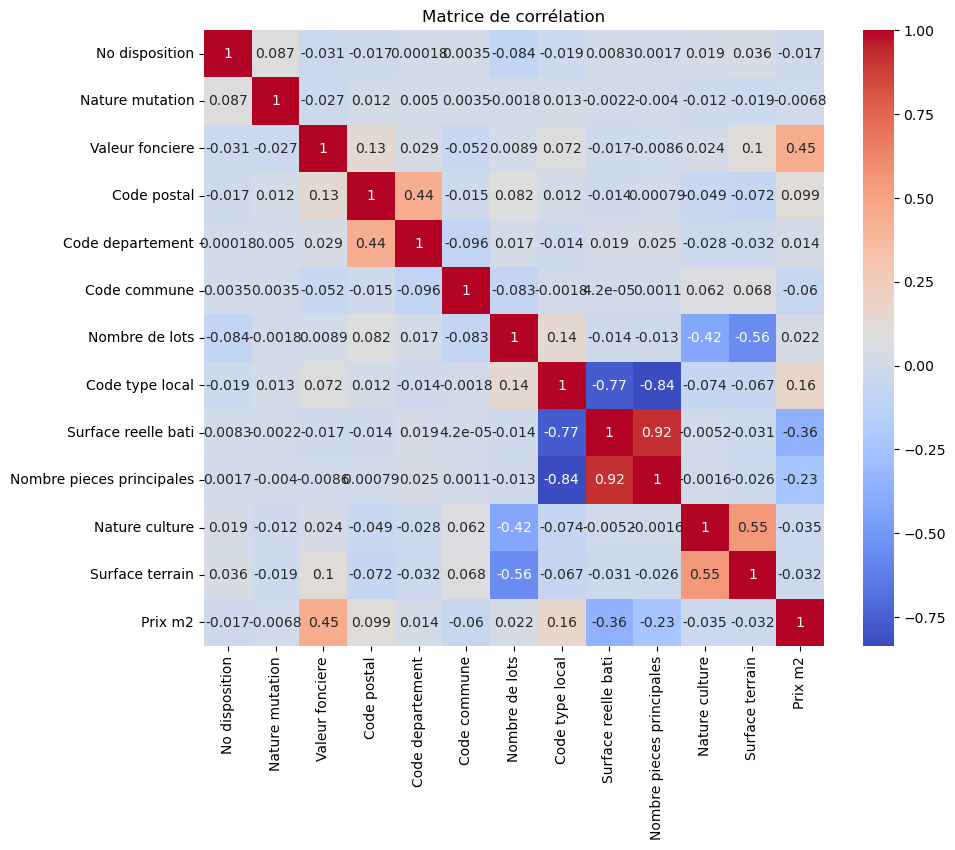

In [24]:
# Matrice de corrélation : 

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

On peut observer qu'il y a une corrélation entre : 

- Prix m2 et Valeur Foncière, Surface reelle bati 

- Nombre pièces principales et Code type local, Surface reelle bati    (plus la surface est grande plus il y a des pièces)

- Surface terrain et Nature Culture, Nombres de lots (la surface de terrain donne une idée sur la nature cultrue du terrain)


### Analyse Générale

In [25]:
# Répartition des locaux 
r = df['Code type local'].value_counts()
r

3.0    575891
2.0    320901
1.0    120624
4.0     31006
Name: Code type local, dtype: int64

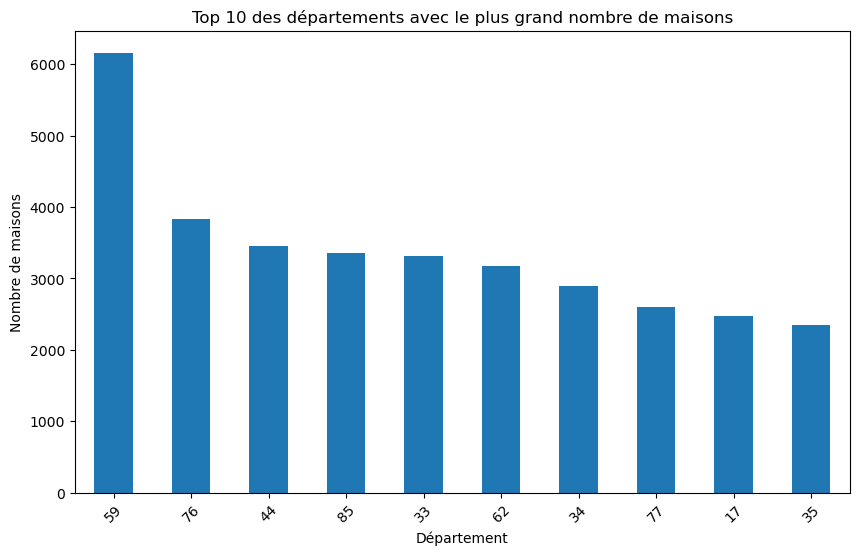

In [26]:
# Filtrer les données pour ne prendre en compte que les maisons
df_maisons = df[df['Code type local'] == 1]

# Calculer le nombre de maisons par département
nombre_maisons_par_departement = df_maisons['Code departement'].value_counts().head(10)

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
nombre_maisons_par_departement.plot(kind='bar')
plt.xlabel('Département')
plt.ylabel('Nombre de maisons')
plt.title('Top 10 des départements avec le plus grand nombre de maisons')
plt.xticks(rotation=45)

plt.show()


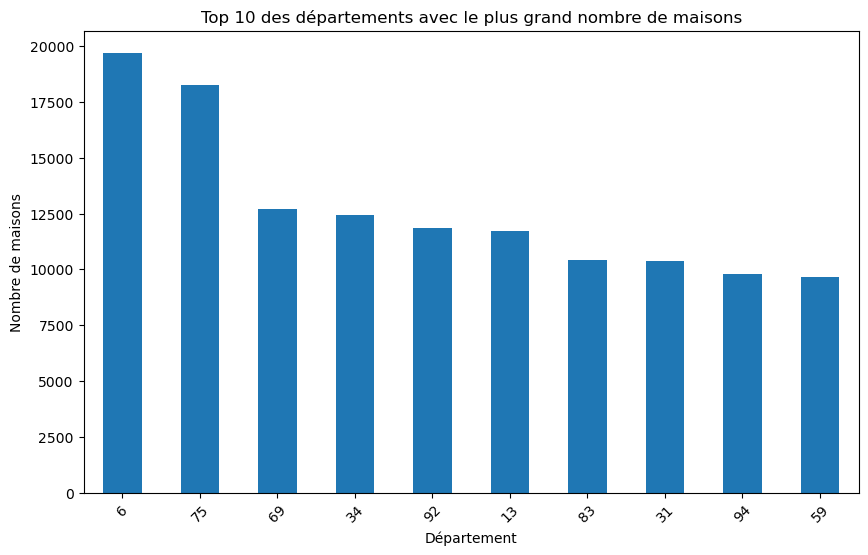

In [27]:
# Filtrer les données pour ne prendre en compte que les appartements
df_app = df[df['Code type local'] == 2]

# Calculer le nombre de maisons par département
nombre_app_par_departement = df_app['Code departement'].value_counts().head(10)

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
nombre_app_par_departement.plot(kind='bar')
plt.xlabel('Département')
plt.ylabel('Nombre de maisons')
plt.title('Top 10 des départements avec le plus grand nombre de maisons')
plt.xticks(rotation=45)

plt.show()

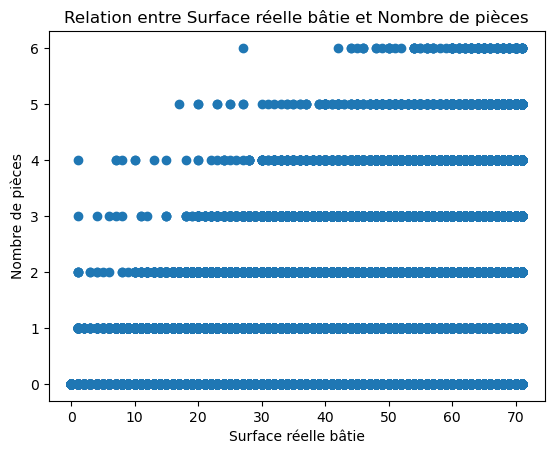

In [28]:
import matplotlib.pyplot as plt

# Extraire les données de surface réelle bâtie et nombre de pièces
surface_batie = df['Surface reelle bati']
nombre_pieces = df['Nombre pieces principales']

# Créer le diagramme de dispersion
plt.scatter(surface_batie, nombre_pieces)
plt.xlabel('Surface réelle bâtie')
plt.ylabel('Nombre de pièces')
plt.title('Relation entre Surface réelle bâtie et Nombre de pièces')

plt.show()


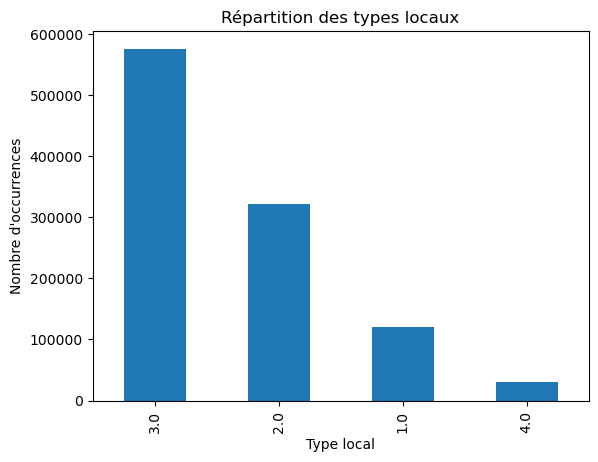

In [29]:
r.plot(kind='bar')
plt.xlabel('Type local')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des types locaux')
plt.ticklabel_format(style='plain', axis='y')  # Désactive la notation scientifique sur l'axe des ordonnées
plt.show()

Cet histogramme renseigne sur la distribution nationale de la colonne 'Type Local' , avec une forte proportion de dépendances notamment. Les appartements sont également plus présents que les maisons.

/var/folders/pb/g39g8dqd05s2q7q7ypdhy9180000gn/T/ipykernel_6036/2963771778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date mutation'] = pd.to_datetime(df['Date mutation'])


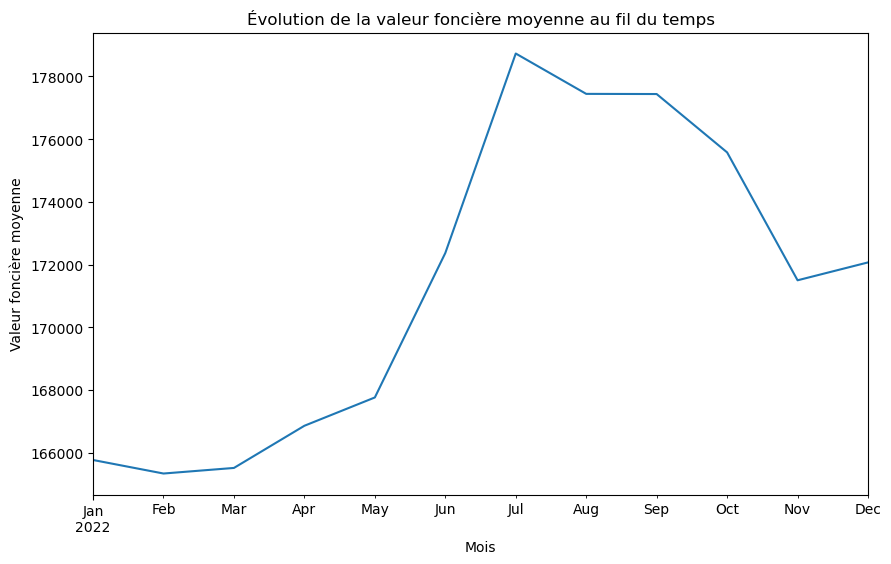

In [30]:
# Convertir la colonne de dates en type datetime si nécessaire
df['Date mutation'] = pd.to_datetime(df['Date mutation'])

# Calculer la valeur foncière moyenne par mois
valeur_fonciere_moyenne_par_mois = df.groupby(df['Date mutation'].dt.to_period('M'))['Valeur fonciere'].mean()

# Créer le graphique linéaire
plt.figure(figsize=(10, 6))
valeur_fonciere_moyenne_par_mois.plot(kind='line')
plt.xlabel('Mois')
plt.ylabel('Valeur foncière moyenne')
plt.title('Évolution de la valeur foncière moyenne au fil du temps')

plt.show()



Voici une représentation temporelle sur l'année 2022 de la valeur foncière moyenne. On observe 1 pic très clair : sur la période de juillet. Cela peut s'expliquer par la période, dans laquelle il fait beau et chaud. En effet, généralement, les personnes sont de meilleure humeur dans des périodes comme celles-ci et sont donc plus aptes à acheter et/ou vendre.

On observe également une très faible activité en début d'année, ce qui peut s'expliquer par certains facteurs comme le temps froid et pluvieux, la recherche d'une stabilité en début d'année, etc.

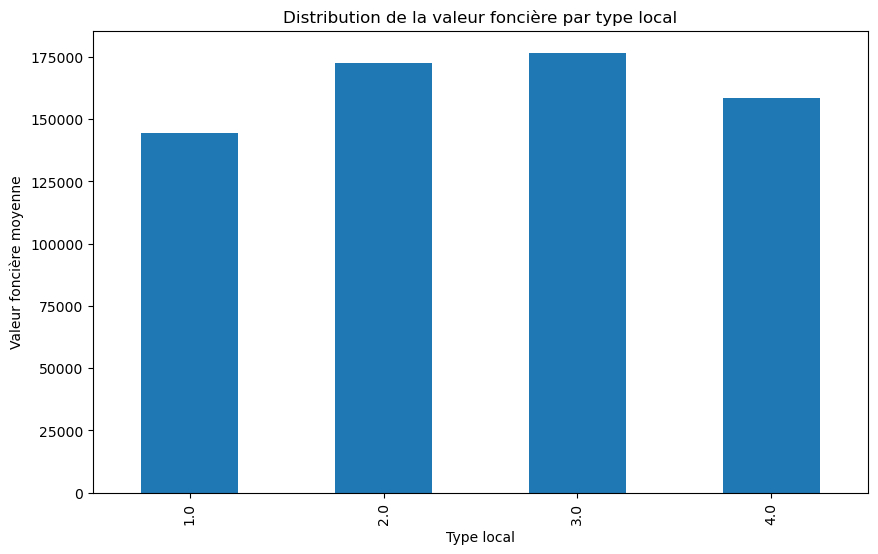

In [31]:
# Calculer la valeur foncière moyenne par type local
valeur_fonciere_moyenne_par_type = df.groupby('Code type local')['Valeur fonciere'].mean()

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
valeur_fonciere_moyenne_par_type.plot(kind='bar')
plt.xlabel('Type local')
plt.ylabel('Valeur foncière moyenne')
plt.title('Distribution de la valeur foncière par type local')

plt.show()

Ce diagramme à barres montre la valeur foncière des différents types locaux. 
On observe que les dépendances possèdent une valeur foncière moyenne à peine plus élévée par rapport aux autres types locaux où l'on peut noter que les appartements ont une valeur foncière plus élevée que les maisons.

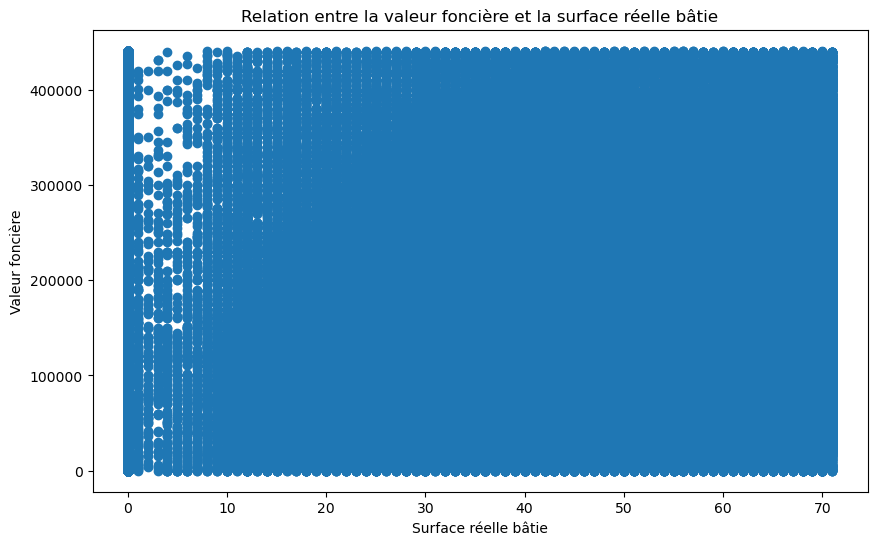

In [32]:
# Créer un sous-ensemble de données contenant les colonnes 'Valeur fonciere' et 'Surface reelle bati'
df_subset = df[['Valeur fonciere', 'Surface reelle bati']]

# Supprimer les lignes avec des valeurs manquantes dans les deux colonnes
df_subset = df_subset.dropna(subset=['Valeur fonciere', 'Surface reelle bati'])

# Créer le graphique de dispersion
plt.figure(figsize=(10, 6))
plt.scatter(df_subset['Surface reelle bati'], df_subset['Valeur fonciere'])
plt.xlabel('Surface réelle bâtie')
plt.ylabel('Valeur foncière')
plt.title('Relation entre la valeur foncière et la surface réelle bâtie')

plt.show()

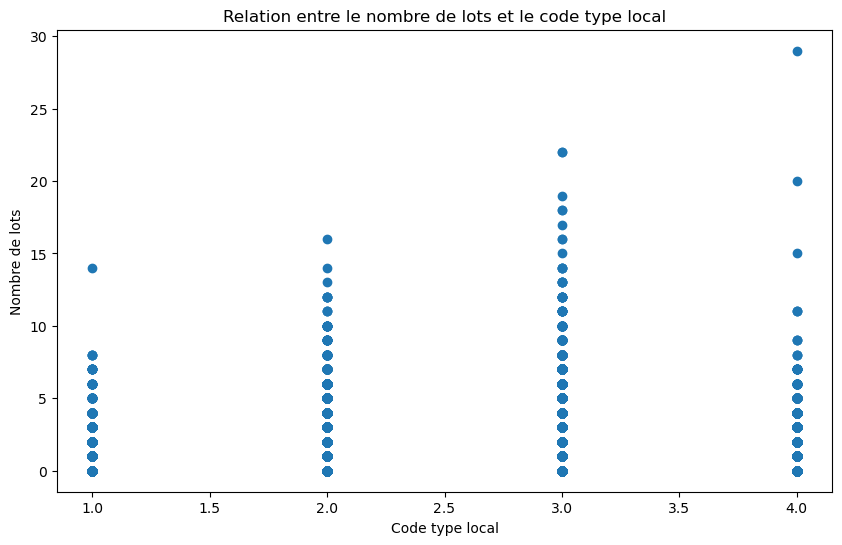

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer un sous-ensemble de données contenant les colonnes 'Code type local' et 'Nombre de lots'
df_subset = df[['Code type local', 'Nombre de lots']]

# Créer le scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_subset['Code type local'], df_subset['Nombre de lots'])
plt.xlabel('Code type local')
plt.ylabel('Nombre de lots')
plt.title('Relation entre le nombre de lots et le code type local')

plt.show()

On remarque que les maisons sont les types locaux qui possèdent le plus petit nombre de lots en moyenne (environ 4-5), ce qui est logique car les maisons ne possèdent pas de biens communs comme les appartements par exemples (parking, caves, box...).

De plus, les dépendances sont les types qui possèdent le plus de types locaux (12 en moyenne).

### Paris 

In [34]:
paris_df = df[df['Code departement'] == 75]
repartition_paris_type_local = paris_df['Code type local'].value_counts()
repartition_paris_type_local
paris_df

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code postal,Code departement,Code commune,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Prix m2
3706375,1,2022-01-06,1,12500.0,75020,75,120,1,3.0,0.0,0.0,0.0,0.0,NaN
3706376,1,2022-01-04,1,5000.0,75019,75,119,1,3.0,0.0,0.0,0.0,0.0,NaN
3706380,1,2022-01-05,1,320000.0,75010,75,110,2,3.0,0.0,0.0,0.0,0.0,NaN
3706381,1,2022-01-05,1,320000.0,75010,75,110,2,2.0,33.0,2.0,0.0,0.0,9696.97
3706382,1,2022-01-07,1,320000.0,75020,75,120,2,3.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803864,1,2022-12-28,1,213000.0,75006,75,106,1,3.0,0.0,0.0,0.0,0.0,NaN
3803871,1,2022-11-03,5,291000.0,75015,75,115,1,3.0,0.0,0.0,0.0,0.0,NaN
3803872,1,2022-11-03,5,291000.0,75015,75,115,1,2.0,35.0,2.0,0.0,0.0,8314.29
3803883,1,2022-12-30,1,15500.0,75013,75,113,1,3.0,0.0,0.0,0.0,0.0,NaN


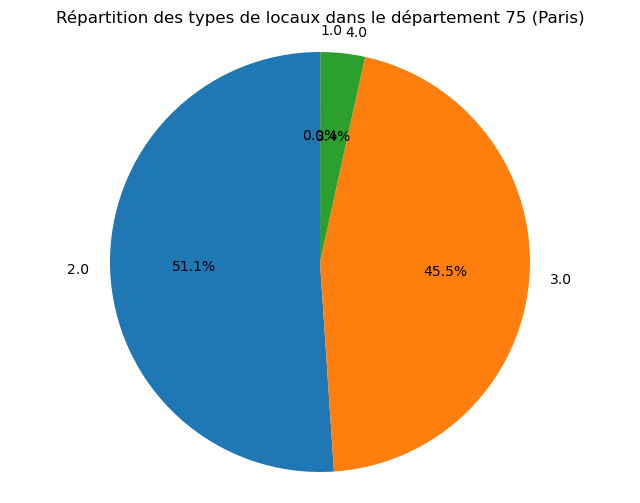

In [35]:
plt.figure(figsize=(8, 6))
plt.pie(repartition_paris_type_local, labels=repartition_paris_type_local.index, autopct='%1.1f%%', startangle=90, labeldistance=1.1)
plt.axis('equal')
plt.title('Répartition des types de locaux dans le département 75 (Paris)')
plt.show()

On observe une forte proportion d'appartements et de dépendances dans la ville de Paris, avec évidemment une très faible quantité de maisons. Cela paraît logique car cette ville est très dynamique avec une très faible proportion de maisons dans la ville même (il y aura évidemment plus de maisons dans la banlieue parisienne par exemple).

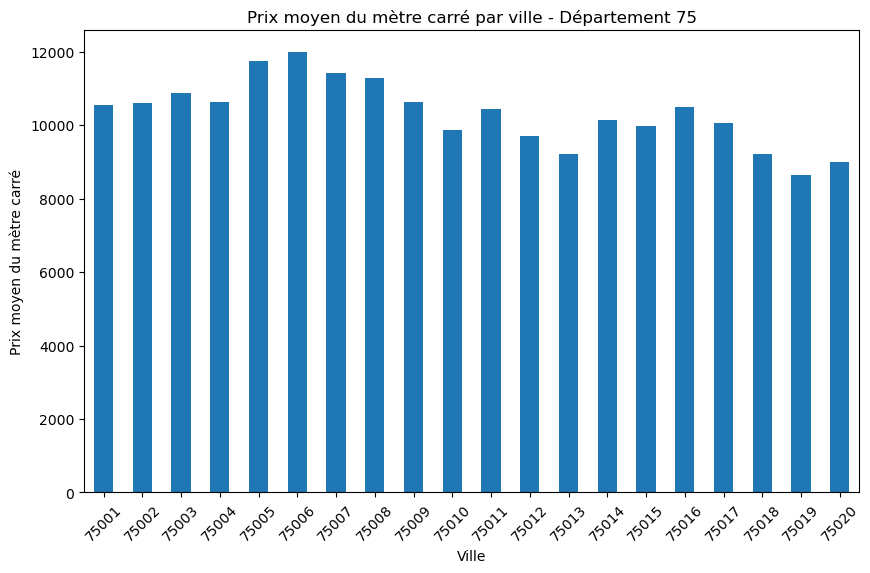

In [36]:
# Filtrer les données pour un département spécifique


val_departement = 75
paris_df = df[df['Code departement'] == val_departement]


# Calculer le prix moyen du mètre carré pour chaque ville du département
prix_moyen_paris = paris_df.groupby('Code postal')['Prix m2'].mean()

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
prix_moyen_paris.plot(kind='bar')
plt.xlabel('Ville')
plt.ylabel('Prix moyen du mètre carré')
plt.title('Prix moyen du mètre carré par ville - Département {}'.format(val_departement))
plt.xticks(rotation=45)

# Formater les valeurs de l'axe des y en format non scientifique
plt.ticklabel_format(style='plain', axis='y')

plt.show()

On réalise une étude sur le prix du mètre carré à Paris selon les arrondissements. Cela peut s'avérer très utile pour les étudiants ayant des contraintes économiques et voulant s'installer à Paris par exemple.
On observe que le 6e, 5e et 7e arrondissement se démarquent par leur prix moyen du mètre carré (environ 12 000 euros) plus élevé que les autres arrondissements. 
Cependant, on observe malgré tout une certaine harmonisation dans tous les arrondissements (le 13e et le 19e sont les moins chers).

### Dordogne

In [37]:
dordogne_df = df[df['Code departement'] == 24]
repartition_dordogne_type_local = dordogne_df['Code type local'].value_counts()
print(repartition_dordogne_type_local)

3.0    3887
1.0    1665
2.0    1141
4.0     248
Name: Code type local, dtype: int64


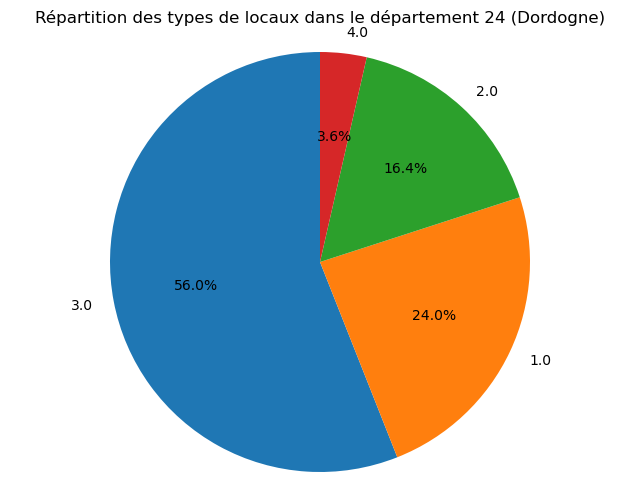

In [38]:
plt.figure(figsize=(8, 6))
plt.pie(repartition_dordogne_type_local, labels=repartition_dordogne_type_local.index, autopct='%1.1f%%', startangle=90, labeldistance=1.1)
plt.axis('equal')
plt.title('Répartition des types de locaux dans le département 24 (Dordogne)')
plt.show()



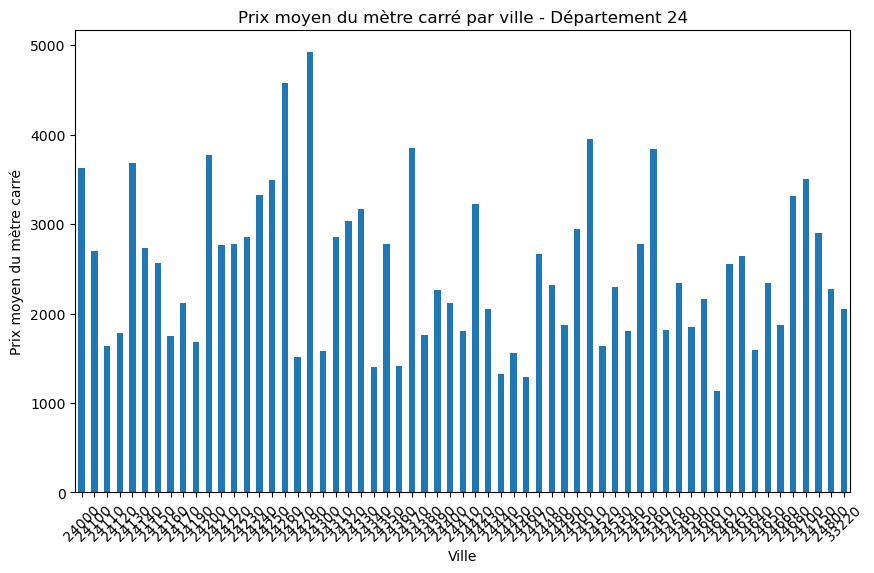

In [39]:
# Filtrer les données pour un département spécifique


val_departement = 24
dor_df = df[df['Code departement'] == val_departement]


# Calculer le prix moyen du mètre carré pour chaque ville du département
prix_moyen_dordogne = dor_df.groupby('Code postal')['Prix m2'].mean()

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
prix_moyen_dordogne.plot(kind='bar')
plt.xlabel('Ville')
plt.ylabel('Prix moyen du mètre carré')
plt.title('Prix moyen du mètre carré par ville - Département {}'.format(val_departement))
plt.xticks(rotation=45)

# Formater les valeurs de l'axe des y en format non scientifique
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Nous avons voulu faire une comparaison entre une grande ville dynamique comme Paris et une région beaucoup moins peuplée et dynamique. Tout d'abord, on peut observer qu'au sein du dataset, il y a beaucoup plus de maisons ici qu'à Paris (logique du fait d'une zone campagnarde).

Dans une zone plus campagnarde comme la Dordogne, on se rend compte qu'il y a beaucoup de dépendances et à l'inverse beaucoup moins d'appartements qu'à Paris.

# Machine Learning 

### Linear Regression

In [40]:
# Division en ensemble de sous entrainement 
ss_paris = df.loc[(df['Code postal']>=75000.0) & (df['Code postal']<76000.0) & (df['Code type local']==2)]
ss_paris.drop(['Date mutation','Nature mutation','Code postal','Code commune','Nature culture','No disposition','Nombre de lots'], axis=1, inplace=True)
ss_paris

/var/folders/pb/g39g8dqd05s2q7q7ypdhy9180000gn/T/ipykernel_6036/1621512182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_paris.drop(['Date mutation','Nature mutation','Code postal','Code commune','Nature culture','No disposition','Nombre de lots'], axis=1, inplace=True)


,Valeur fonciere,Code departement,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Prix m2
3489422,400000.0,92,2.0,42.0,2.0,0.0,9523.81
3491479,396200.0,92,2.0,42.0,2.0,0.0,9433.33
3491482,299500.0,92,2.0,34.0,1.0,0.0,8808.82
3493290,410000.0,92,2.0,46.0,2.0,0.0,8913.04
3493707,238000.0,92,2.0,25.0,1.0,0.0,9520.00
...,...,...,...,...,...,...,...
3803849,316420.0,75,2.0,34.0,2.0,0.0,9306.47
3803850,280000.0,75,2.0,25.0,2.0,0.0,11200.00
3803853,71125.0,75,2.0,13.0,1.0,0.0,5471.15
3803860,101500.0,75,2.0,24.0,1.0,0.0,4229.17


Mean Squared Error (MSE): 6979709.170598173
Coefficient of Determination (R²): 0.6468609937972241


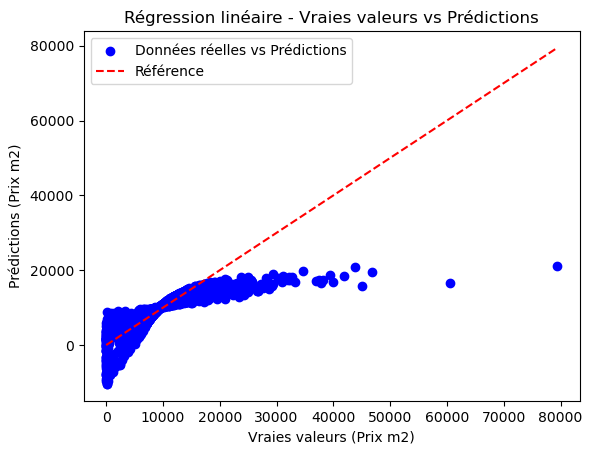

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = ss_paris.drop("Prix m2", axis=1)  
y = ss_paris["Prix m2"]  # variable a predire

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un objet de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R²):", r2)
# Afficher les résultats sur un graphique
plt.scatter(y_test, y_pred, color='blue', label='Données réelles vs Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Référence')
plt.xlabel('Vraies valeurs (Prix m2)')
plt.ylabel('Prédictions (Prix m2)')
plt.title('Régression linéaire - Vraies valeurs vs Prédictions')
plt.legend()
plt.show()




### Regression Ridge

Mean Squared Error (MSE): 6979710.336101389
Coefficient of Determination (R²): 0.6468609348284852


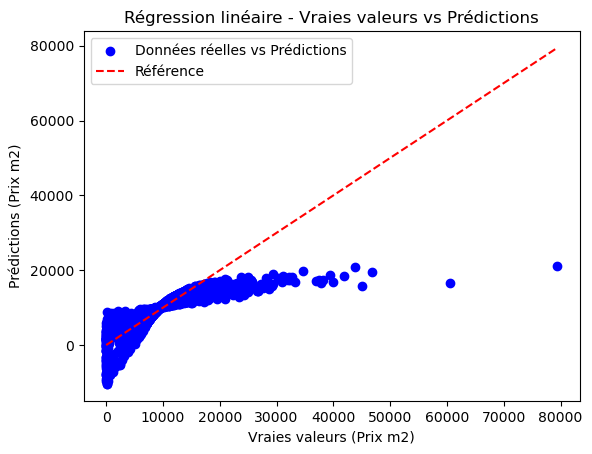

In [42]:
from sklearn.linear_model import Ridge

X = ss_paris.drop("Prix m2", axis=1)  
y = ss_paris["Prix m2"]  # variable a predire

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un objet de régression Ridge
model = Ridge(alpha=1.0)  # alpha est le coefficient de pénalité, ajustez-le selon vos besoins

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R²):", r2)
# Afficher les résultats sur un graphique
plt.scatter(y_test, y_pred, color='blue', label='Données réelles vs Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Référence')
plt.xlabel('Vraies valeurs (Prix m2)')
plt.ylabel('Prédictions (Prix m2)')
plt.title('Régression linéaire - Vraies valeurs vs Prédictions')
plt.legend()
plt.show()


### Regression Lasso

Mean Squared Error (MSE): 6979838.07907407
Coefficient of Determination (R²): 0.646854471661422


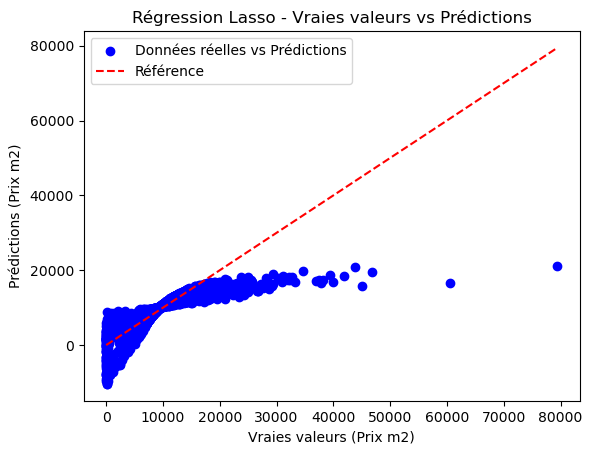

In [43]:
from sklearn.linear_model import Lasso


X = ss_paris.drop("Prix m2", axis=1)  
y = ss_paris["Prix m2"]  # variable a predire

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un objet de régression Lasso
model = Lasso()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R²):", r2)

# Afficher les résultats sur un graphique
plt.scatter(y_test, y_pred, color='blue', label='Données réelles vs Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Référence')
plt.xlabel('Vraies valeurs (Prix m2)')
plt.ylabel('Prédictions (Prix m2)')
plt.title('Régression Lasso - Vraies valeurs vs Prédictions')
plt.legend()
plt.show()


Mean Squared Error (MSE): 3836483025.214132
Coefficient of Determination (R²): 0.6709524032447076


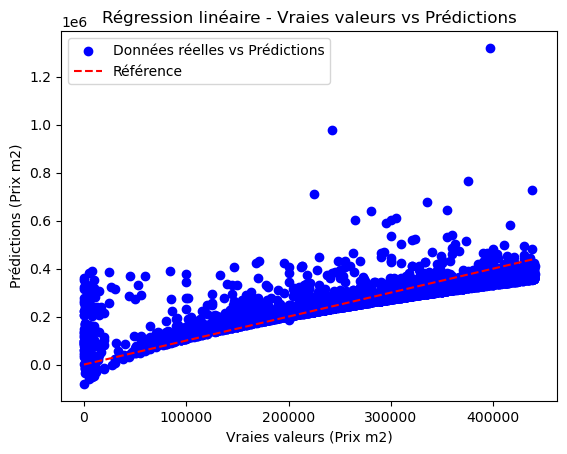

In [44]:
X = ss_paris.drop("Valeur fonciere", axis=1)  
y = ss_paris["Valeur fonciere"]  # variable a predire

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un objet de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R²):", r2)
# Afficher les résultats sur un graphique
plt.scatter(y_test, y_pred, color='blue', label='Données réelles vs Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Référence')
plt.xlabel('Vraies valeurs (Prix m2)')
plt.ylabel('Prédictions (Prix m2)')
plt.title('Régression linéaire - Vraies valeurs vs Prédictions')
plt.legend()
plt.show()

### KMEANS

/Users/kandasamyahkkash/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


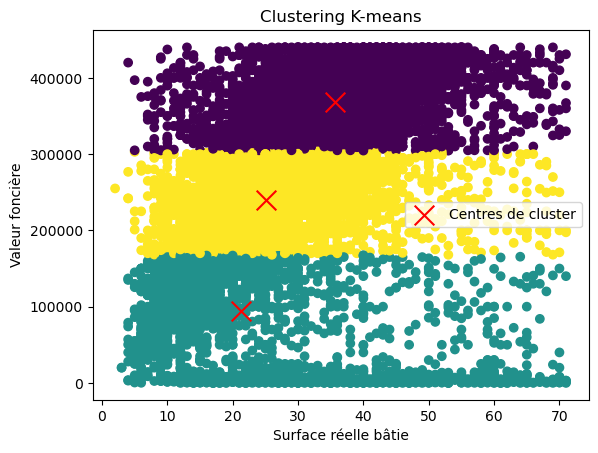

-34037017528633.777

In [45]:
from sklearn.cluster import KMeans

X = ss_paris[['Surface reelle bati', 'Valeur fonciere']]

#  nombre de clusters
k = 3

model = KMeans(n_clusters=k, random_state=0)
model.fit(X)

#  labels de cluster à chaque point de données
labels = model.labels_

#  coordonnées des centres de cluster
cluster_centers = model.cluster_centers_

# Affichage des clusters
plt.scatter(X['Surface reelle bati'], X['Valeur fonciere'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=200, label='Centres de cluster')
plt.xlabel('Surface réelle bâtie')
plt.ylabel('Valeur foncière')
plt.title('Clustering K-means')
plt.legend()
plt.show()
model.score(X,y)

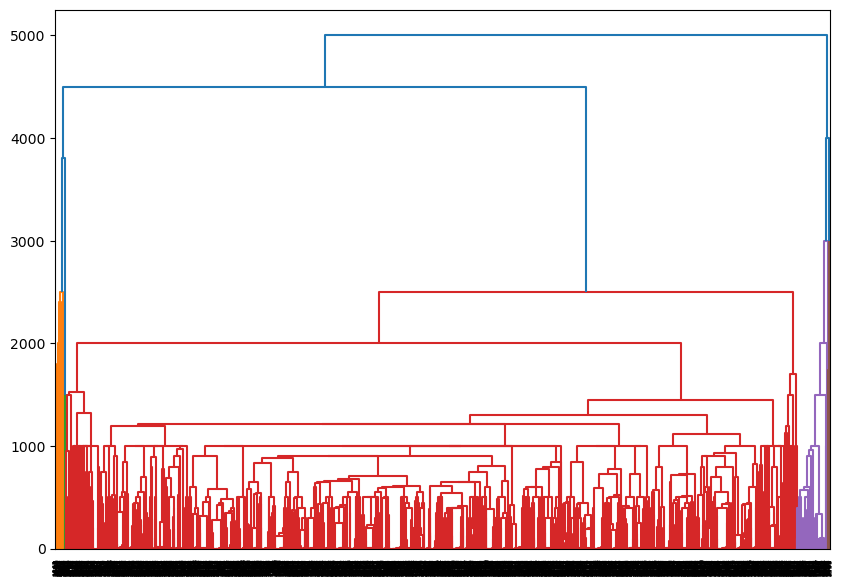

Number of clusters:  1458


In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


X = ss_paris.drop("Prix m2", axis=1)  # Drop Prix m2
y = ss_paris["Prix m2"]  # target

# division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  hierarchical clustering
linked = linkage(X_test, method='single')

#  dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

# les  clusters
max_distance = 10
clusters = fcluster(linked, max_distance, criterion='distance')

# afficher le nombre de clusters
print("Number of clusters: ", len(np.unique(clusters)))